In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
test       = pd.read_csv('test.csv')
train      = pd.read_csv('train.csv')

In [3]:
print('train.shape      :', train.shape)
print('test.shape       :', test.shape)

train.shape      : (1460, 81)
test.shape       : (1459, 80)


In [4]:
print('train.columns      :', train.columns)
print('test.columns       :', test.columns)

train.columns      : Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Gar

In [5]:
str_delimaters = '-., |:/\\'
for c in str_delimaters:
    train.columns      = train.columns.str.replace(c, '')
    test.columns       = test.columns.str.replace(c, '')

In [6]:
print('train.columns      :', train.columns)
print('test.columns       :', test.columns)

train.columns      : Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Gar

In [7]:
def compare_columns(df1, df2):
    df1_columns_set = set(df1.columns)
    df2_columns_set = set(df2.columns)
    print('df1_columns_set - df2_columns_set :', df1_columns_set - df2_columns_set)
    print('df2_columns_set - df1_columns_set :', df2_columns_set - df1_columns_set)

In [8]:
compare_columns(train, test)

df1_columns_set - df2_columns_set : {'SalePrice'}
df2_columns_set - df1_columns_set : set()


In [9]:
train[['Id', 'SalePrice']].head()

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000


In [10]:
test[['Id']].head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [11]:
print('train[SalePrice].describe()      :')
train['SalePrice'].describe()

train[SalePrice].describe()      :


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [12]:
print('train [SalePrice].info() :')
train[['SalePrice']].info()

train [SalePrice].info() :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [13]:
test_id = test['Id']

In [14]:
train      = train.drop(columns=['Id'])
test       = test.drop(columns=['Id'])

In [15]:
compare_columns(train, test)

df1_columns_set - df2_columns_set : {'SalePrice'}
df2_columns_set - df1_columns_set : set()


In [16]:
print('train.shape      :', train.shape)
print('test.shape       :', test.shape)

train.shape      : (1460, 80)
test.shape       : (1459, 79)


In [17]:
common_columns = list(set(train.columns) & set(test.columns))
print('len of common columns :', len(common_columns))
print(list(common_columns))

len of common columns : 79
['GarageYrBlt', 'Fireplaces', 'LotShape', 'Heating', 'Exterior2nd', 'GarageCars', 'MiscFeature', 'PoolArea', 'FullBath', '3SsnPorch', 'WoodDeckSF', 'BsmtCond', 'BldgType', '2ndFlrSF', 'BsmtFullBath', 'Foundation', '1stFlrSF', 'BsmtFinSF2', 'HeatingQC', 'LandSlope', 'BsmtExposure', 'BsmtUnfSF', 'ScreenPorch', 'LotFrontage', 'GarageCond', 'MoSold', 'ExterCond', 'Condition2', 'MiscVal', 'GrLivArea', 'YearBuilt', 'BsmtFinType2', 'BsmtFinType1', 'CentralAir', 'Alley', 'TotalBsmtSF', 'EnclosedPorch', 'OverallQual', 'ExterQual', 'Fence', 'TotRmsAbvGrd', 'Condition1', 'KitchenQual', 'OpenPorchSF', 'Utilities', 'MasVnrType', 'LotArea', 'KitchenAbvGr', 'GarageQual', 'BsmtHalfBath', 'BsmtQual', 'LowQualFinSF', 'Street', 'RoofStyle', 'YrSold', 'LandContour', 'HouseStyle', 'PavedDrive', 'Functional', 'GarageArea', 'BsmtFinSF1', 'MasVnrArea', 'Exterior1st', 'PoolQC', 'Neighborhood', 'SaleType', 'HalfBath', 'SaleCondition', 'BedroomAbvGr', 'MSZoning', 'LotConfig', 'Fireplac

In [18]:
def describe_column(column_name):
    print('train[%s].describe()      :' % column_name)
    print(train[column_name].describe())
    print('test[%s].describe()       :' % column_name)
    print(test[column_name].describe())

In [19]:
describe_column('MSSubClass')

train[MSSubClass].describe()      :
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
test[MSSubClass].describe()       :
count    1459.000000
mean       57.378341
std        42.746880
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64


In [20]:
describe_column('MSZoning')

train[MSZoning].describe()      :
count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
test[MSZoning].describe()       :
count     1455
unique       5
top         RL
freq      1114
Name: MSZoning, dtype: object


In [21]:
def info_column(column_name):
    print('train', column_name, '.info()      :')
    print(train[column_name].info())
    print('+++'*20)
    print('test', column_name, '.info()       :')
    print(test[column_name].info())
    print('+++'*20)

In [22]:
info_column(['MSSubClass'])

train ['MSSubClass'] .info()      :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MSSubClass  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
None
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
test ['MSSubClass'] .info()       :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MSSubClass  1459 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
None
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [23]:
info_column(['MSZoning'])

train ['MSZoning'] .info()      :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MSZoning  1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
None
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
test ['MSZoning'] .info()       :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MSZoning  1455 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB
None
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [24]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [26]:
data = train.copy()

In [27]:
data = data.drop_duplicates()
print('data.shape      :', data.shape)

data.shape      : (1460, 80)


In [28]:
print('test.shape      :', test.shape)

test.shape      : (1459, 79)


In [29]:
del train

In [30]:
data.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

In [31]:
test.dtypes.value_counts()

object     43
int64      25
float64    11
dtype: int64

# EDA & VISUALIZATION

mu = 180921.20 and sigma = 79415.29



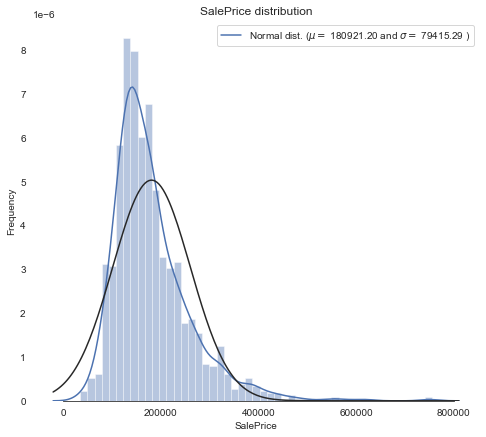

In [32]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))

#Check the new distribution 
sns.distplot(data['SalePrice'], fit=stats.norm, color="b")

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(data['SalePrice'])
print('mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)])
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

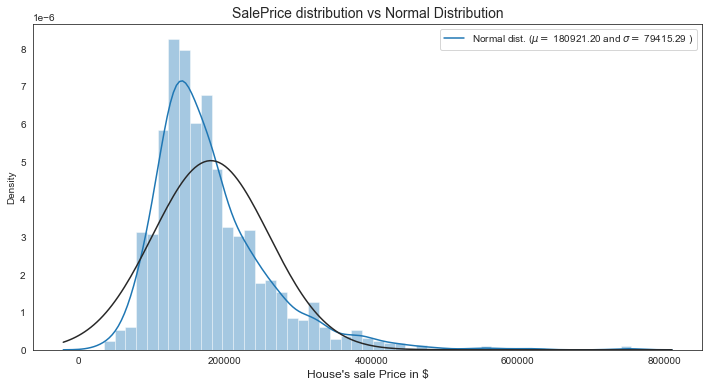

In [33]:
(mu, sigma) = stats.norm.fit(data['SalePrice'])
plt.figure(figsize = (12,6))
sns.distplot(data['SalePrice'], kde = True, hist=True, fit = stats.norm)
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 14)
plt.xlabel("House's sale Price in $", fontsize = 12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.show()

Text(0, 0.5, 'Density')

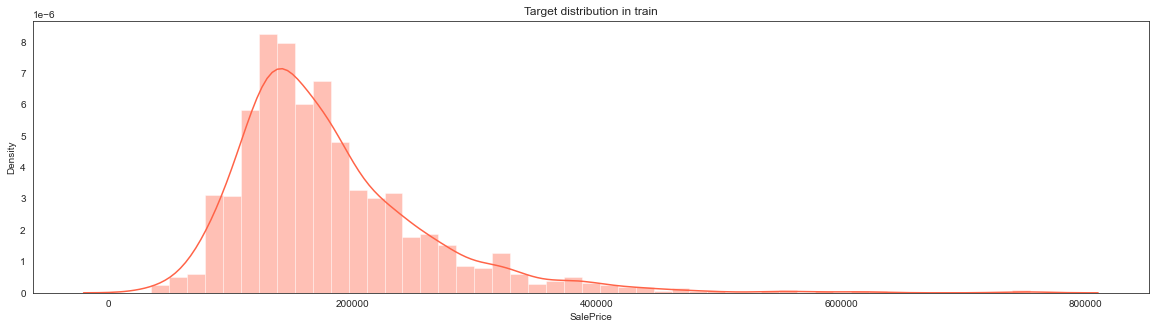

In [34]:
plt.figure(figsize=(20,5))
sns.distplot(data.SalePrice, color="tomato")
plt.title("Target distribution in train")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

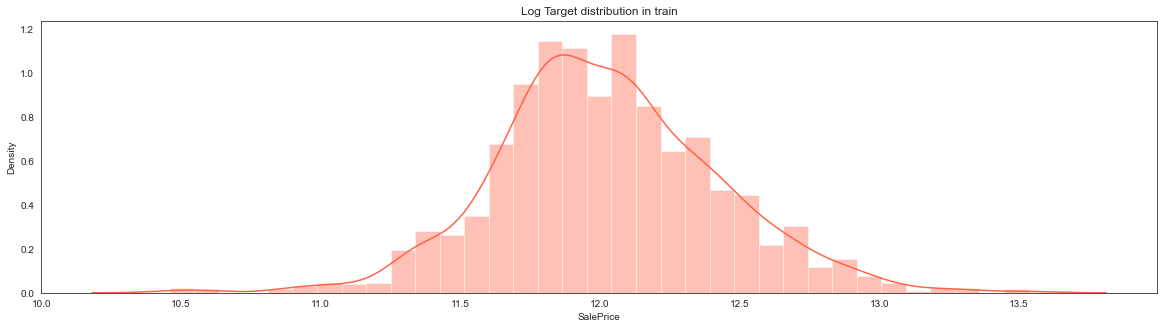

In [35]:
plt.figure(figsize=(20,5))
sns.distplot(np.log(data.SalePrice), color="tomato")
plt.title("Log Target distribution in train")
plt.ylabel("Density")

In [36]:
data["LogSalePrice"] = data['SalePrice'].apply(np.log)

In [37]:
shap_t,shap_p = stats.shapiro(data['SalePrice'])
print("Skewness: %f" % abs(data['SalePrice']).skew())
print("Kurtosis: %f" % abs(data['SalePrice']).kurt())
print("Shapiro_Test: %f" % shap_t)
print("Shapiro_Test: %f" % shap_p)

Skewness: 1.882876
Kurtosis: 6.536282
Shapiro_Test: 0.869672
Shapiro_Test: 0.000000


## Dropping nan-features

In [38]:
# determine the threshold for missing values
def calc_percent_missing(df):
    percent_missing = {}
    for col in df.columns:
        percent_missing[col] = df[col].isnull().mean()
    return percent_missing

In [39]:
percent_missing = calc_percent_missing(data)
percent_missing = pd.DataFrame(sorted(percent_missing.items(), key=lambda x: x[1], reverse=True))
percent_missing = percent_missing[percent_missing[1] >= 0.02]
percent_missing

,0,1
0,PoolQC,0.995205
1,MiscFeature,0.963014
2,Alley,0.937671
3,Fence,0.807534
4,FireplaceQu,0.472603
5,LotFrontage,0.177397
6,GarageType,0.055479
7,GarageYrBlt,0.055479
8,GarageFinish,0.055479
9,GarageQual,0.055479


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'PoolQC'),
  Text(1, 0, 'MiscFeature'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'FireplaceQu'),
  Text(5, 0, 'LotFrontage'),
  Text(6, 0, 'GarageType'),
  Text(7, 0, 'GarageYrBlt'),
  Text(8, 0, 'GarageFinish'),
  Text(9, 0, 'GarageQual'),
  Text(10, 0, 'GarageCond'),
  Text(11, 0, 'BsmtExposure'),
  Text(12, 0, 'BsmtFinType2'),
  Text(13, 0, 'BsmtQual'),
  Text(14, 0, 'BsmtCond'),
  Text(15, 0, 'BsmtFinType1')])

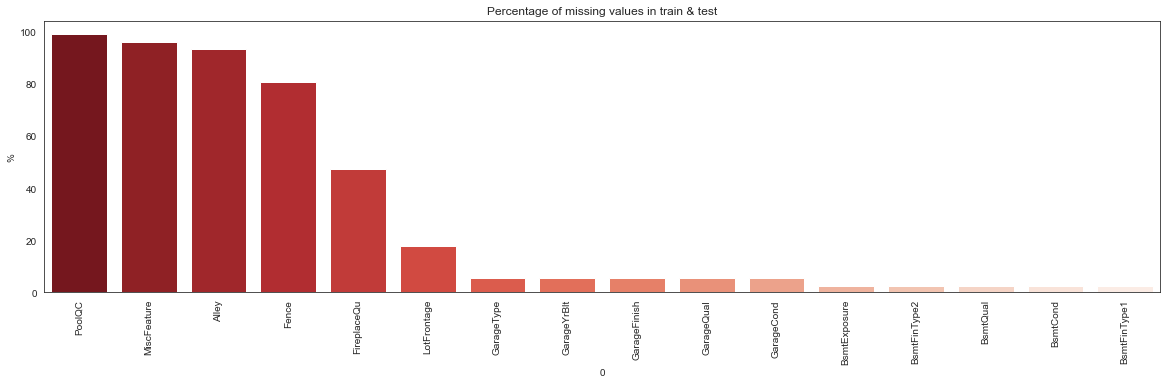

In [40]:
plt.figure(figsize=(20,5))
sns.barplot(x=percent_missing[0], y=percent_missing[1] * 100, palette="Reds_r");
plt.title("Percentage of missing values in train & test")
plt.ylabel("%")
plt.xticks(rotation=90)

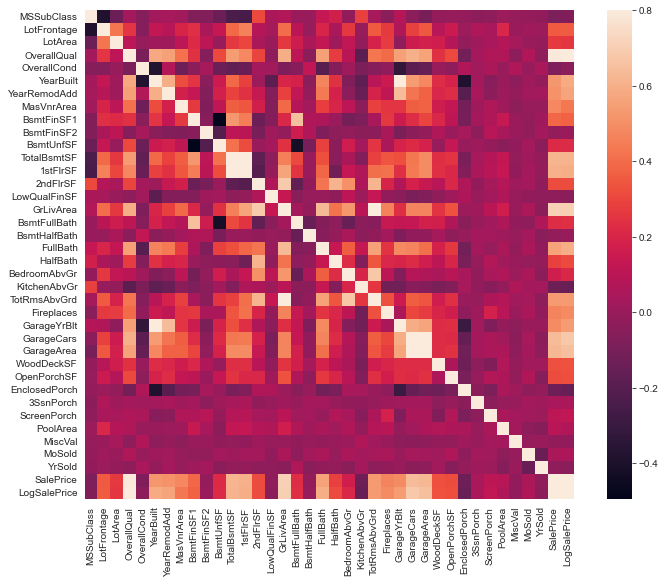

In [41]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

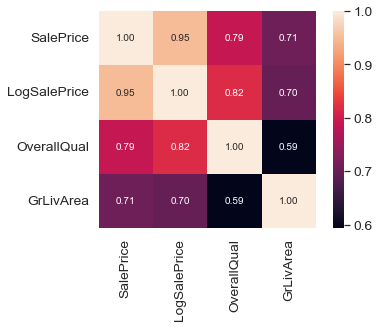

In [42]:
#saleprice correlation matrix
k = 4 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

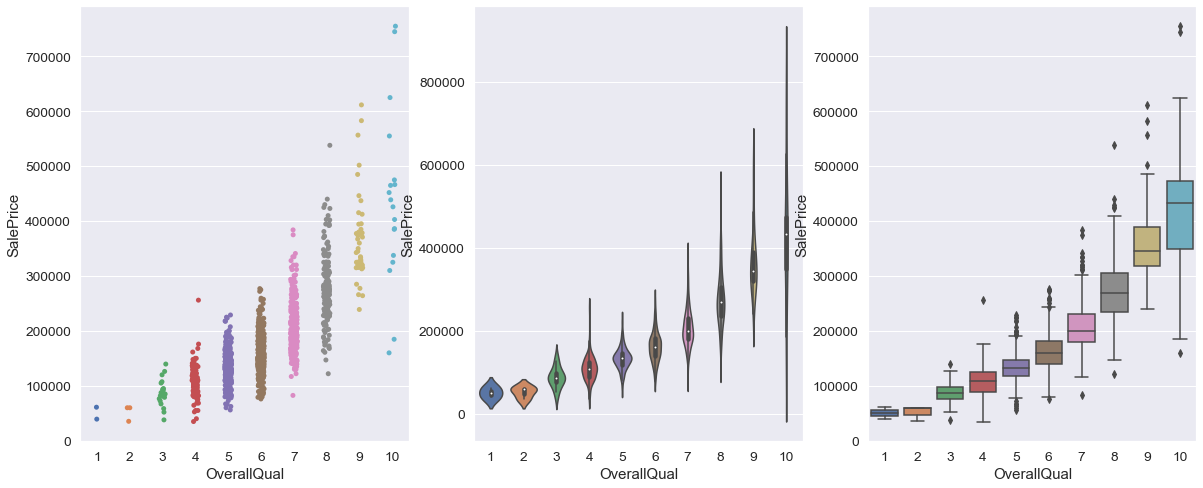

In [43]:
# OverallQuall - SalePrice [Pearson = 0.8]
figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=data, x = 'OverallQual', y='SalePrice', ax = ax[0])
sns.violinplot(data=data, x = 'OverallQual', y='SalePrice', ax = ax[1])
sns.boxplot(data=data, x = 'OverallQual', y='SalePrice', ax = ax[2])
plt.show()

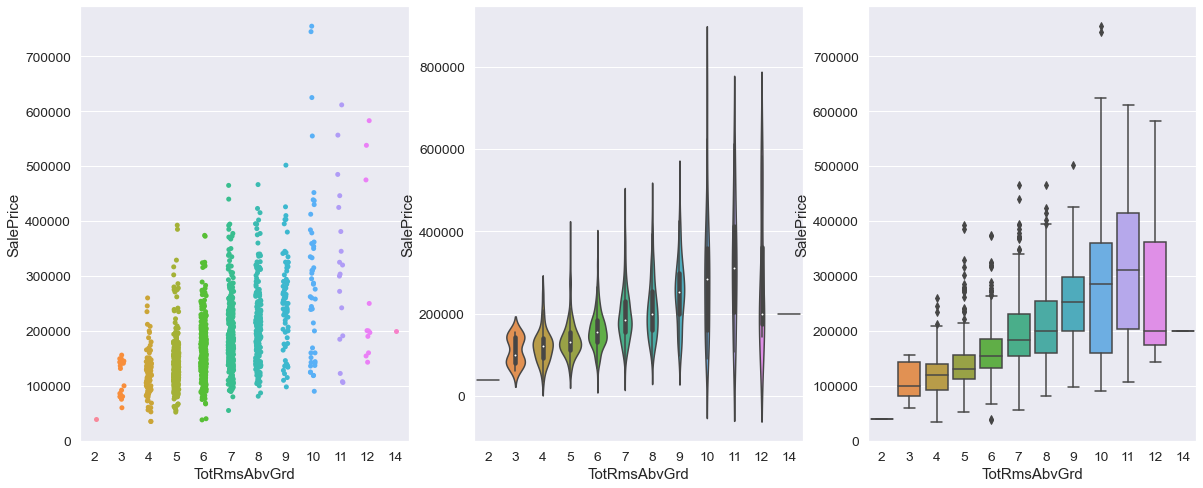

In [44]:
# TotRmsAbvGrd - SalePrice [Pearson = 0.50]
figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=data, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[0])
sns.violinplot(data=data, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[1])
sns.boxplot(data=data, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[2])
plt.show()

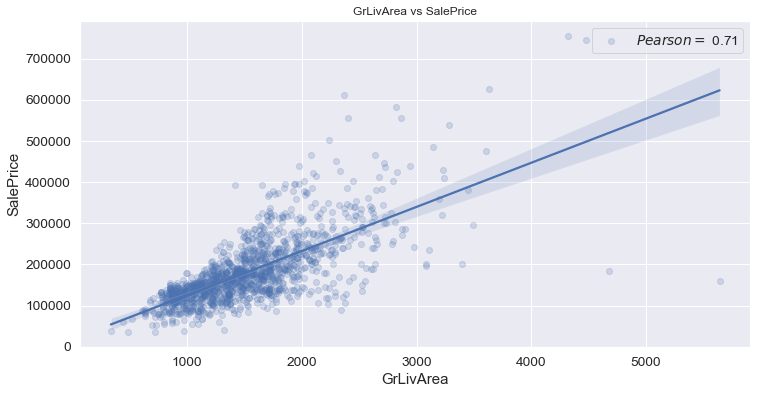

In [45]:
# GrLivArea vs SalePrice [corr = 0.71]
Pearson_GrLiv = 0.71
plt.figure(figsize = (12,6))
sns.regplot(data=data, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)], loc = 'best')
plt.show()

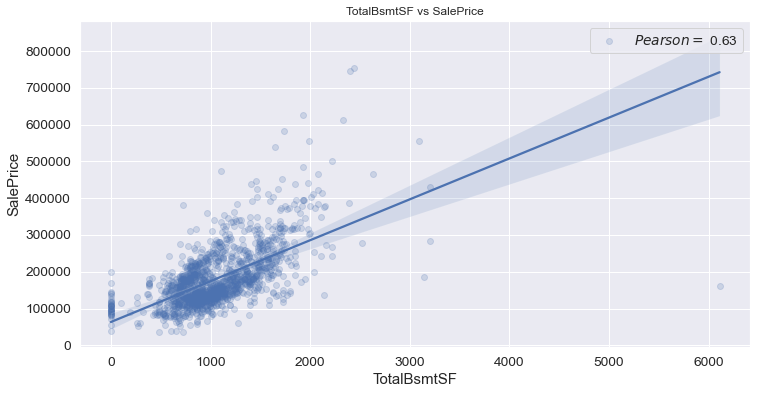

In [46]:
Pearson_TBSF = 0.63
plt.figure(figsize = (12,6))
sns.regplot(data=data, x = 'TotalBsmtSF', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('TotalBsmtSF vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_TBSF)], loc = 'best')
plt.show()

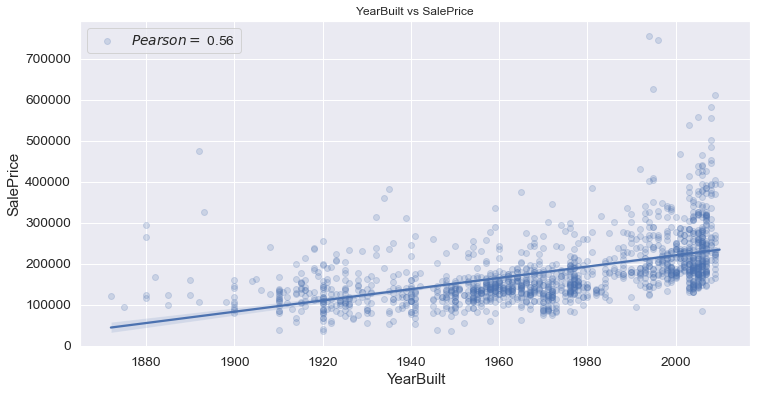

In [47]:
# YearBuilt vs SalePrice
Pearson_YrBlt = 0.56
plt.figure(figsize = (12,6))
sns.regplot(data=data, x = 'YearBuilt', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_YrBlt)], loc = 'best')
plt.show()

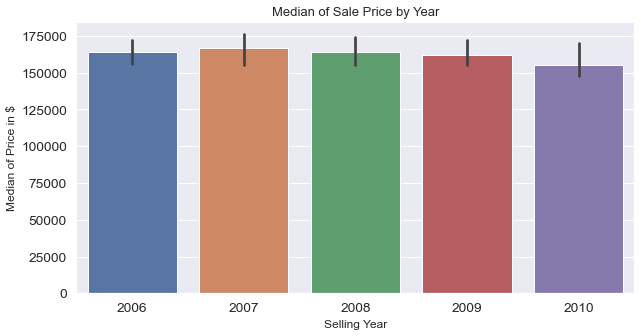

In [48]:
# Median of Sale Price by Year
plt.figure(figsize = (10,5))
sns.barplot(x='YrSold', y="SalePrice", data = data, estimator = np.median)
plt.title('Median of Sale Price by Year', fontsize = 13)
plt.xlabel('Selling Year', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

# DATA PREPROCESSING

In [49]:
# Looking at NaN % within the data
nan = pd.DataFrame(data.isna().mean(), columns = ['Perc(%)'])
nan['feat'] = nan.index
nan = nan[nan['Perc(%)'] > 0].sort_values(by = ['Perc(%)'])
nan['Usability'] = np.where(nan['Perc(%)'] >= 0.025, 'Discard', 'Keep')
nan

,Perc(%),feat,Usability
Electrical,0.000685,Electrical,Keep
MasVnrType,0.005479,MasVnrType,Keep
MasVnrArea,0.005479,MasVnrArea,Keep
BsmtQual,0.025342,BsmtQual,Discard
BsmtCond,0.025342,BsmtCond,Discard
BsmtFinType1,0.025342,BsmtFinType1,Discard
BsmtExposure,0.026027,BsmtExposure,Discard
BsmtFinType2,0.026027,BsmtFinType2,Discard
GarageCond,0.055479,GarageCond,Discard
GarageQual,0.055479,GarageQual,Discard


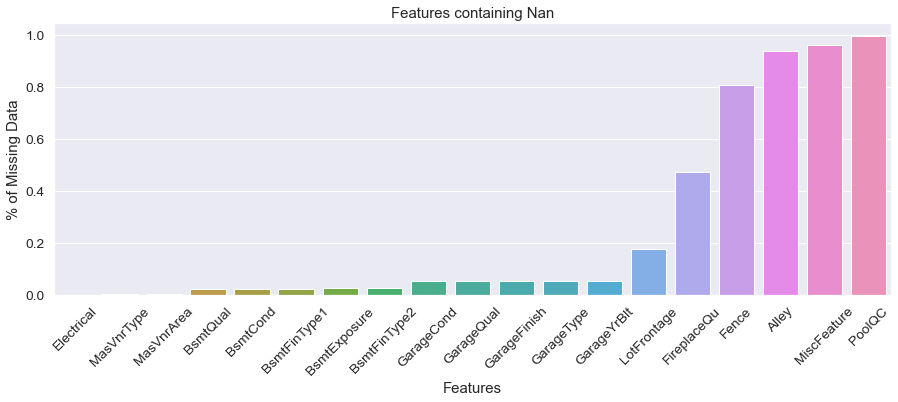

In [50]:
# Plotting Nan
plt.figure(figsize = (15,5))
sns.barplot(x = nan['feat'], y = nan['Perc(%)'])
plt.xticks(rotation=45)
plt.title('Features containing Nan')
plt.xlabel('Features')
plt.ylabel('% of Missing Data')
plt.show()

In [51]:
droped_columns = nan[nan['Perc(%)'] >= 0.05]['feat']
droped_columns

GarageCond        GarageCond
GarageQual        GarageQual
GarageFinish    GarageFinish
GarageType        GarageType
GarageYrBlt      GarageYrBlt
LotFrontage      LotFrontage
FireplaceQu      FireplaceQu
Fence                  Fence
Alley                  Alley
MiscFeature      MiscFeature
PoolQC                PoolQC
Name: feat, dtype: object

In [52]:
data_train_test = pd.concat([data, test])
print('data_train_test.shape      :', data_train_test.shape)

data_train_test.shape      : (2919, 81)


In [53]:
# Removing the useless variables
data_train_test = data_train_test.drop(columns=droped_columns)
print('data_train_test.shape      :', data_train_test.shape)

data_train_test.shape      : (2919, 70)


In [54]:
# Converting non-numeric predictors stored as numbers into string
data_train_test['MSSubClass'] = data_train_test['MSSubClass'].apply(str)
data_train_test['YrSold']     = data_train_test['YrSold'].apply(str)
data_train_test['MoSold']     = data_train_test['MoSold'].apply(str)

In [55]:
# Filling Categorical NaN (That we know how to fill due to the description file )
data_train_test['Functional']  = data_train_test['Functional'].fillna('Typ')
data_train_test['Electrical']  = data_train_test['Electrical'].fillna("SBrkr")
data_train_test['KitchenQual'] = data_train_test['KitchenQual'].fillna("TA")
data_train_test['Exterior1st'] = data_train_test['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data_train_test['Exterior2nd'] = data_train_test['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data_train_test['SaleType']    = data_train_test['SaleType'].fillna(data['SaleType'].mode()[0])

In [59]:
# Checking the features with NaN remained out
def check_nan_exists(df):
    res = {}
    for col in df:
        if df[col].isna().sum() > 0:
            res[col] = [df[col].isna().sum()]
    return pd.DataFrame(res).T

In [60]:
check_nan_exists(data_train_test)

,0
MSZoning,4
Utilities,2
MasVnrType,24
MasVnrArea,23
BsmtQual,81
BsmtCond,82
BsmtExposure,82
BsmtFinType1,79
BsmtFinSF1,1
BsmtFinType2,80


In [61]:
def replace_nan_values(df):
    for col in df:
        if df[col].isna().sum() > 0:
            df[col] = df[col].fillna(0)

In [62]:
replace_nan_values(data_train_test)

In [63]:
check_nan_exists(data_train_test)

""


In [64]:
print('data_train_test.shape      :', data_train_test.shape)

data_train_test.shape      : (2919, 70)


## FEATURE ENGINEERING

In [65]:
data_train_test["SqFtPerRoom"]        = data_train_test["GrLivArea"] / \
                                                        (data_train_test["TotRmsAbvGrd"] + data_train_test["FullBath"]
                                                       + data_train_test["HalfBath"] + data_train_test["KitchenAbvGr"])
data_train_test['Total_Home_Quality'] = data_train_test['OverallQual'] + data_train_test['OverallCond']
data_train_test['Total_Bathrooms']    = data_train_test['FullBath'] + 0.5 * data_train_test['HalfBath'] \
                                      + data_train_test['BsmtFullBath'] + 0.5 * data_train_test['BsmtHalfBath']
data_train_test["HighQualSF"]         = data_train_test["1stFlrSF"] + data_train_test["2ndFlrSF"]

In [74]:
# Creating dummy variables from categorical features
data_train_test_dummy = pd.get_dummies(data_train_test)

In [75]:
numeric_features = data_train_test_dummy.dtypes[data_train_test_dummy.dtypes != object].index
numeric_features

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=293)

In [76]:
skewed_features  = data_train_test_dummy[numeric_features].apply(lambda x: stats.skew(x)).sort_values(ascending=False)
skewed_features

MSSubClass_150         54.000003
Condition2_RRAn        54.000003
Exterior1st_ImStucc    54.000003
RoofMatl_Membran       54.000003
Condition2_RRAe        54.000003
                         ...    
Heating_GasA           -7.866532
RoofMatl_CompShg       -8.055971
Condition2_Norm        -9.711353
Street_Pave           -15.500133
Utilities_AllPub      -31.144840
Length: 293, dtype: float64

In [77]:
high_skew = skewed_features[skewed_features > 0.5]
high_skew

MSSubClass_150         54.000003
Condition2_RRAn        54.000003
Exterior1st_ImStucc    54.000003
RoofMatl_Membran       54.000003
Condition2_RRAe        54.000003
                         ...    
Exterior2nd_VinylSd     0.639492
BsmtFullBath            0.624832
Exterior1st_VinylSd     0.622114
OverallCond             0.570312
MSSubClass_20           0.540089
Length: 250, dtype: float64

In [78]:
skew_index = high_skew.index
skew_index

Index(['MSSubClass_150', 'Condition2_RRAn', 'Exterior1st_ImStucc',
       'RoofMatl_Membran', 'Condition2_RRAe', 'RoofMatl_Roll',
       'RoofMatl_Metal', 'RoofMatl_ClyTile', 'Heating_Floor',
       'Exterior2nd_Other',
       ...
       'TotRmsAbvGrd', 'Fireplaces', 'LotShape_IR1', 'ExterQual_Gd',
       'HalfBath', 'Exterior2nd_VinylSd', 'BsmtFullBath',
       'Exterior1st_VinylSd', 'OverallCond', 'MSSubClass_20'],
      dtype='object', length=250)

In [79]:
# Normalize skewed features using log_transformation
for i in skew_index:
    data_train_test_dummy[i] = np.log1p(data_train_test_dummy[i])

In [80]:
data_train_test_dummy.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9.042040,7,1.791759,2003,2003,5.283204,6.561031,0.0,5.017280,6.753438,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
1,9.169623,6,2.197225,1976,1976,0.000000,6.886532,0.0,5.652489,7.141245,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
2,9.328212,7,1.791759,2001,2002,5.093750,6.188264,0.0,6.075346,6.825460,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
3,9.164401,7,1.791759,1915,1970,0.000000,5.379897,0.0,6.293419,6.629363,...,0.0,0.0,0.0,1,0.693359,0.0,0.0,0.0,0,0.0
4,9.565284,8,1.791759,2000,2000,5.860786,6.486161,0.0,6.196444,7.044033,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0


In [83]:
print(list(data_train_test_dummy.columns))

['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'LogSalePrice', 'SqFtPerRoom', 'Total_Home_Quality', 'Total_Bathrooms', 'HighQualSF', 'MSSubClass_120', 'MSSubClass_150', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSZoning_0', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',

In [84]:
data_train_test_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 293 entries, LotArea to SaleCondition_Partial
dtypes: float16(223), float64(31), int64(6), uint8(33)
memory usage: 2.2 MB


In [85]:
data_train_test_dummy.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,9.094915,6.089072,1.867152,1971.312778,1984.264474,2.079239,4.224955,0.680974,5.625218,6.730833,...,0.001901,0.056793,0.001662,0.865365,0.045135,0.002850,0.005699,0.010925,0.822885,0.058197
std,0.509882,1.409947,0.173171,30.291442,20.894344,2.620916,2.981841,1.878530,1.869356,1.182460,...,0.036255,0.190186,0.033936,0.341392,0.171143,0.044373,0.062622,0.086426,0.381832,0.192261
min,7.170888,1.000000,0.693147,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.919854,5.000000,1.791759,1953.500000,1965.000000,0.000000,0.000000,0.000000,5.398163,6.677083,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,9.154193,6.000000,1.791759,1973.000000,1993.000000,0.000000,5.910797,0.000000,6.148468,6.897705,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,9.356257,7.000000,1.945910,2001.000000,2004.000000,5.102906,6.598509,0.000000,6.692083,7.172425,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,12.279537,10.000000,2.302585,2010.000000,2010.000000,7.378384,8.638525,7.331060,7.756623,8.717846,...,0.693359,0.693359,0.693359,1.000000,0.693359,0.693359,0.693359,0.693359,1.000000,0.693359


In [86]:
data_train_test_dummy.shape

(2919, 293)

In [88]:
data_train_test_dummy.dtypes.value_counts()

float16    223
uint8       33
float64     31
int64        6
dtype: int64

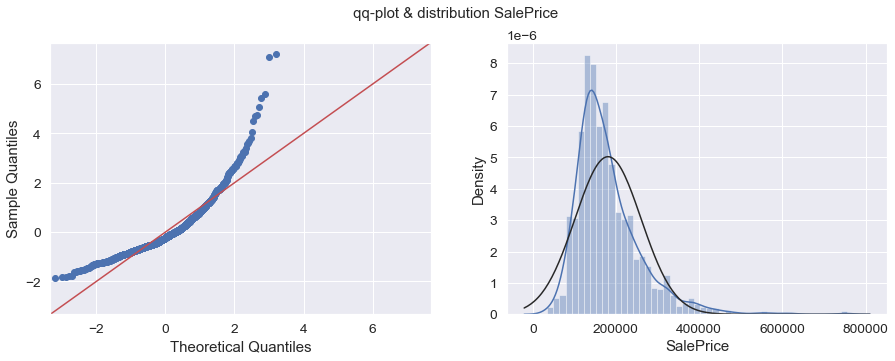

In [89]:
# SalePrice before transformation
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)
sm.qqplot(data['SalePrice'], stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(data['SalePrice'], kde = True, hist=True, fit = stats.norm, ax = ax[1])
plt.show()

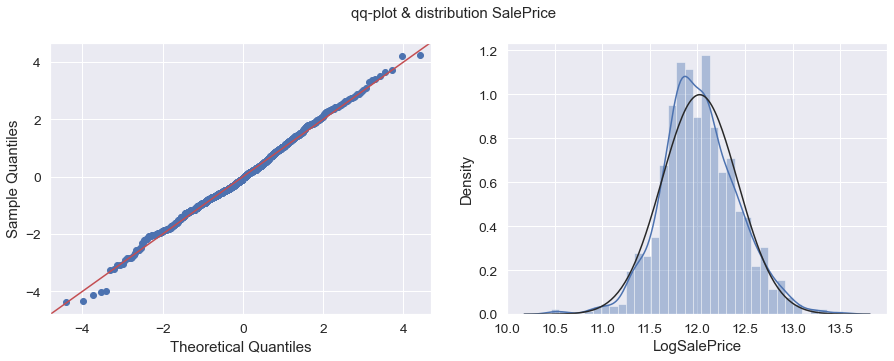

In [90]:
# SalePrice after transformation
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)
sm.qqplot(data['LogSalePrice'], stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(data['LogSalePrice'], kde = True, hist=True, fit = stats.norm, ax = ax[1])
plt.show()

In [93]:
from xgboost                 import XGBRegressor
from sklearn.svm             import SVR
from sklearn.naive_bayes     import GaussianNB
from sklearn.tree            import DecisionTreeRegressor
from sklearn.linear_model    import LinearRegression, BayesianRidge, ElasticNet, Lasso, LassoLarsIC
from sklearn.model_selection import RepeatedKFold, KFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble        import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics         import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.kernel_ridge    import KernelRidge
from sklearn.pipeline        import make_pipeline
from sklearn.preprocessing   import RobustScaler
from sklearn.base            import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [94]:
data_dummy, test_dummy = data_train_test_dummy[:len(data)], data_train_test_dummy[len(data):]

In [95]:
print('data_dummy.shape :', data_dummy.shape)

data_dummy.shape : (1460, 293)


In [96]:
print('test_dummy.shape :', test_dummy.shape)

test_dummy.shape : (1459, 293)


In [97]:
untarget_data = data_dummy.drop(columns=['SalePrice', 'LogSalePrice'])
print('untarget_data.shape :', untarget_data.shape)

untarget_data.shape : (1460, 291)


In [98]:
target = data_dummy['LogSalePrice']
print('target.shape :', target.shape)

target.shape : (1460,)


In [99]:
test_dummy = test_dummy.drop(columns=['SalePrice', 'LogSalePrice'])
print('test_dummy.shape :', test_dummy.shape)

test_dummy.shape : (1459, 291)


In [100]:
# 5 Fold Cross validation
kf = KFold(n_splits=5, shuffle=True)
cv_scores, cv_std = [], []

In [101]:
# Creation of the RMSE metric:    
def rmse(model):
    return np.sqrt(-cross_val_score(model, untarget_data, target, scoring="neg_mean_squared_error", cv=kf))

In [102]:
def apply_learning_algorithm(model):
    score = rmse(model)
    cv_scores.append(score.mean())
    cv_std.append(score.std())

In [106]:
models = [
    LinearRegression(),                    # Linear Regression
    BayesianRidge(compute_score=True),     # Bayesian Ridge Regression
    SVR(),                                 # Support Vector Regression
    DecisionTreeRegressor(),               # Decision Tree Regressor
    RandomForestRegressor(),               # Random Forest Regressor
    XGBRegressor(                          # XGB Regressor
                      colsample_bytree=0.4603, 
                      gamma=0.0468, 
                      learning_rate=0.05, 
                      max_depth=3, 
                      min_child_weight=1.7817, 
                      n_estimators=2200,
                      reg_alpha=0.4640, 
                      reg_lambda=0.8571,
                      subsample=0.5213),
    GradientBoostingRegressor(             # Gradient Boost Regressor
                      n_estimators=3000, 
                      learning_rate=0.05,
                      max_depth=4, 
                      max_features='sqrt',
                      min_samples_leaf=15, 
                      min_samples_split=10, 
                      loss='huber'),
    make_pipeline(                         # Lasso Regression
                      RobustScaler(), 
                      Lasso(alpha =0.0005)),
    make_pipeline(                         # Elastic Net Regression
                      RobustScaler(), 
                      ElasticNet(alpha=0.0005, l1_ratio=.9)),
    KernelRidge(                           # Kernel Ridge Regression
                      alpha=0.6, 
                      kernel='polynomial', 
                      degree=2, 
                      coef0=2.5),
]

In [107]:
baseline_models = [
    'LinearRegression',
    'BayesianRidge', 
    'SupportVectorRegressor', 
    'DecisionTreeRegressor',
    'RandomForestRegressor', 
    'XGBRegressor', 
    'GradientBoostingRegressor', 
    'LassoRegressor',
    'ElasticNetRegressor',
    'KernelRidgeRegressor'
]

In [108]:
for model in models:
    apply_learning_algorithm(model)

In [109]:
print('len(models):', len(models))
print('len(baseline_models)', len(baseline_models))

len(models): 10
len(baseline_models) 10


In [110]:
print('len(cv_scores):', len(cv_scores))

len(cv_scores): 10


In [111]:
print('len(cv_std):', len(cv_std))
cv_std

len(cv_std): 10


[0.021047829842090474,
 0.010357317349985948,
 0.019508703102611494,
 0.014987113465223084,
 0.014750892411034867,
 0.009791200763232097,
 0.01904577180098506,
 0.009514542617145436,
 0.015275506191931704,
 0.03175871179857784]

In [112]:
final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std

In [113]:
final_cv_score

,Regressors,RMSE_mean,RMSE_std
0,LinearRegression,0.140942,0.021048
1,BayesianRidge,0.126516,0.010357
2,SupportVectorRegressor,0.278314,0.019509
3,DecisionTreeRegressor,0.203788,0.014987
4,RandomForestRegressor,0.140326,0.014751
5,XGBRegressor,0.123699,0.009791
6,GradientBoostingRegressor,0.123328,0.019046
7,LassoRegressor,0.125323,0.009515
8,ElasticNetRegressor,0.124883,0.015276
9,KernelRidgeRegressor,0.171182,0.031759


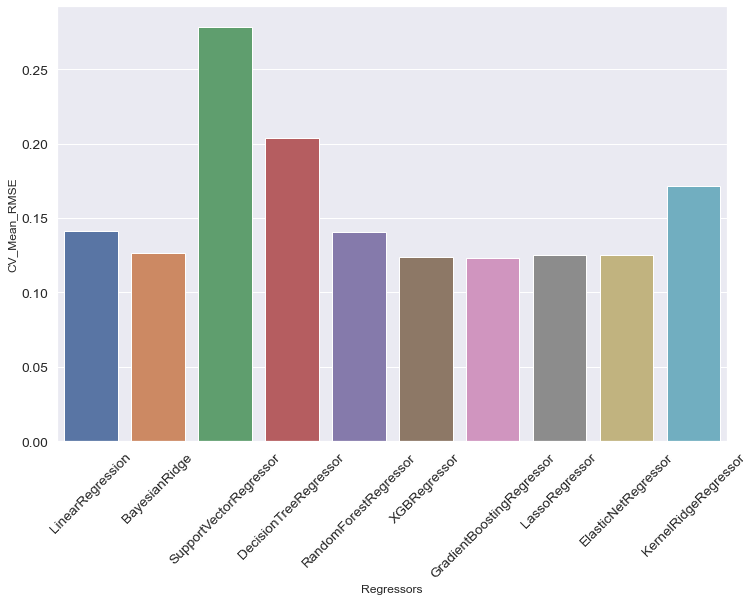

In [114]:
plt.figure(figsize = (12,8))
sns.barplot(final_cv_score['Regressors'],final_cv_score['RMSE_mean'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('CV_Mean_RMSE', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

In [115]:
# Train-Test split the data
x_train, x_validation, y_train, y_validation = \
            train_test_split(untarget_data, target, test_size = 0.1)

In [116]:
best_regressor_name = final_cv_score.sort_values(by=['RMSE_mean']).head(1)['Regressors'].iloc[0]
best_regressor = models[baseline_models.index(best_regressor_name)]
best_regressor

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000)

In [117]:
# The Best Regressor
best_model = best_regressor.fit(x_train, y_train)

In [118]:
# Creation of the RMSE metric:    
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [119]:
pred = best_model.predict(x_validation)
score = rmse(y_validation, pred)
score

0.12530149865935739

# SUBMISSION

In [120]:
# Test CSV Submission
test_pred = best_model.predict(test_dummy)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred 
submission.head()

,Id,SalePrice
0,1461,122691.857927
1,1462,164466.057205
2,1463,186374.396791
3,1464,194683.691254
4,1465,188301.455757


In [121]:
# Saving the results in a csv file
submission.to_csv("submission_1.csv", index = False, header = True)